# SSH Eigenmodes

In this example we consider SSH model which Hamiltonian can be express in the following way,

$$H=-\sum_{ i} v (A_{i}^{\dagger}B_{i}+h.c.)-\sum_{j}w(A^{\dagger}_{i}A_{i+1}+B^{\dagger}_{i}B_{i+1}+h.c. ),$$
here $v$ ($w$) is the overlap integral between the atoms in unit cell (betwens cells).  

In [4]:
!pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import kwant
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla
import scipy as scp
import numpy as np
import scipy
from kwant.physics import dispersion
from numpy.linalg import eig

First of all we have to define our system. 

In [54]:
L = 50
# Building SSH model
def ssh_model(v=1, w=1, L=L, return_only_ham=1):

    syst = kwant.Builder()
    a = 1
    lat = kwant.lattice.chain(a)

    # Define the scattering region
    for n in range(L):
        syst[lat(n)] = 0

    # Left hopping
    for n in range(L):
        if n % 2:
            syst[lat(n - 1), lat(n)] = v

    # Right hopping
    for n in range(1, L):
        if not n % 2:
            syst[lat(n - 1), lat(n)] = w

    syst = syst.finalized()

    if return_only_ham:
        return syst.hamiltonian_submatrix(sparse=True)
    else:
        return syst.hamiltonian_submatrix(sparse=False)


In our case we put onsite equal to zero. In order to defne our system we establish diferent hoppings for odd and even sites. For even sites the Hamiltonian part discrebes intercells hoppings is
$$-\sum_{ i} v (A_{i}^{\dagger}B_{i}+h.c.)$$
while for odds we have got
$$-\sum_{j}w(A^{\dagger}_{i}A_{i+1}+B^{\dagger}_{i}B_{i+1}+h.c. )$$




In [66]:
from   ipywidgets import *

def SSH_energy(v,w):
  w1,v1=eig(ssh_model(w=w, v=v, L=L, return_only_ham=0))
  plt.plot(np.arange(0,L,1),sorted(np.real(w1)),'.')


interact(SSH_energy,v=(0,1,0.1),w=(0,1,0.1));

interactive(children=(FloatSlider(value=0.0, description='v', max=1.0), FloatSlider(value=0.0, description='w'…

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


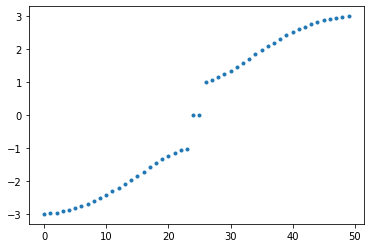

In [60]:
w1,v1=eig(ssh_model(w=2, v=1, L=L, return_only_ham=0))

plt.plot(np.arange(0,L,1),sorted(w1),'.')

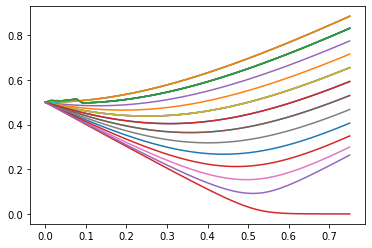

In [39]:
L = 50
# Building SSH model
def ssh_model(w=1, v=1, L=L, return_only_ham=1):

    syst = kwant.Builder()
    a = 1
    lat = kwant.lattice.chain(a)

    # Define the scattering region
    for n in range(L):
        syst[lat(n)] = 0

    # Left hopping
    for n in range(L):
        if n % 2:
            syst[lat(n - 1), lat(n)] = w

    # Right hopping
    for n in range(1, L):
        if not n % 2:
            syst[lat(n - 1), lat(n)] = v

    # kwant.plot(syst)
    syst = syst.finalized()
    

    if return_only_ham:
        return syst.hamiltonian_submatrix(sparse=True)
    else:
        return syst.hamiltonian_submatrix(sparse=False)


def find_continuator(w: list, next_vectors: list) -> int:
    max_product = np.dot(w, next_vectors[0])
    max_index = 0

    for i in range(len(next_vectors)):
        product = np.abs(np.dot(w, next_vectors[i]))
        if product > max_product:
            max_product = product
            max_index = i
    return max_index


def plot_probability(k_tab: list, eig_number: int, t1=0.5, show_unsorted=False) -> None:
    e_val_matrix = np.empty(shape=(len(k_tab), eig_number))
    e_vec_matrix = np.empty(shape=(len(k_tab), eig_number, L), dtype=complex)

    for i in range(len(k_tab)):
        t2 = k_tab[i]
        ham = ssh_model(t1, t2)
        e_val, e_vec = scipy.sparse.linalg.eigsh(
            ham, k=eig_number, sigma=0.01, which="LM", return_eigenvectors=True
        )

        e_val_matrix[i] = e_val
        for j in range(eig_number):
            e_vec_matrix[i, j] = e_vec[:, j]
            e_vec_matrix[i, j] = e_vec_matrix[i, j] / np.sqrt(
                np.dot(e_vec_matrix[i, j], e_vec_matrix[i, j])
            )

    for j in range(eig_number):
        pasek = [e_val_matrix[0, j]]
        wektory = [e_vec_matrix[0, j]]

        for i in range(0, len(k_tab) - 1):
            index = find_continuator(wektory[i], e_vec_matrix[i + 1])
            wektory.append(e_vec_matrix[i + 1, index])
            pasek.append(e_val_matrix[i + 1, index])

        plt.plot(k_tab, pasek, label=j)
        if show_unsorted:
            plt.scatter(k_tab, e_val_matrix[:, j], marker=".")


k = np.linspace(0, 0.75, 50)  # Range of k we want to plot
energies_number = L//2  # Number of energy bands to show
plot_probability(k, energies_number)
# plt.xlim(0.25,0.75)
# plt.ylim(-0.5,0.5)
plt.savefig("SSH_spectrum_sort.pdf")
plt.show()
#print(ssh_model(t_1=1, t_2=1, L=L, return_only_ham=0))
w1,v1=eig(ssh_model(w=1, v=2, L=L, return_only_ham=0))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


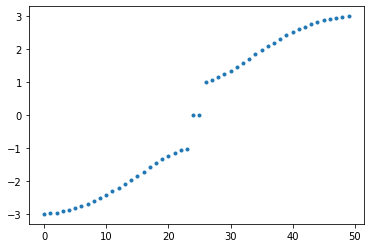

In [40]:
print(np.arange(0,L,1))
plt.plot(np.arange(0,L,1),sorted(w1),'.')